# Grade: /100 + 15 Bonus

## Instructions

- Once the notebook is complete, restart your kernel and rerun your cells

- Submit this notebook to owl by the deadline

- You may use any python library functions you wish to complete the Lab assignment.

This notebook contains the questions for Assignment 2. Make sure to complete this assignment individually and appropriately reference all external code and documentation used.


### Preliminaries

Feel free to add any libraries to the Preliminaries. However, be mindful of every question's restrictions as some may exclude use of some functions.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# from scikeras.wrappers import KerasRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

## Part 1 - Multi-Layer Perceptron (MLP) for Regression (65 pts)

### Dataset

The dataset `startup_success_dataset.csv` contains information on startup companies and is designed to predict the success of these companies based on various features. Your tasks involve data preprocessing, exploratory data analysis, applying machine learning models, and evaluating their performance and fairness.


The dataset contains 1000 records and 14 columns. Here's a brief overview of the columns:

1. StartupID: A unique identifier for each startup.
2. Industry: The industry sector the startup operates in (e.g., Finance, Education, Tech).
3. Age: The age of the startup in years.
4. Location: The geographical location of the startup (e.g., Asia, North America, Europe
5. Funding: The total funding received by the startup in million USD.
6. EmployeeCount: The number of employees working in the startup.
7. ProductCount: The number of products the startup has developed.
8. Patents: The number of patents held by the startup.
9. Partnerships: The number of partnerships the startup has.
10. AnnualRevenue: The annual revenue of the startup in million USD.
11. ProfitMargin: The profit margin of the startup (could be negative).
12. MarketShare: The market share of the startup in percentage.
13. CustomerSatisfaction: The customer satisfaction rating (out of 100).
14. SuccessScore: A score representing the success of the startup (the target variable we aim to predict).

Note that `StartupID` is a unique identifier and does not contribute to predictive modeling.


### Part1 Task A - Data Loading and Preprocessing (10 pts)

Load the provided startup success dataset and prepare it for analysis. Perform necessary preprocessing steps to handle any data inconsistencies and prepare the data for machine learning models.

1. Load the dataset and remove any unnecessary columns.
2. Check for missing values and handle them appropriately (handle missing values separately for numerical and categorical columns. For numerical columns, fill missing values with the mean of their respective columns. For categorical data, if missing values exist, fill them with the mode (most frequent value).
3. Encode categorical variables using **one-hot** encoding technique. For categorical variables, we have two columns to encode:
   - Industry: With 4 unique values.
   - Location: With 3 unique values.
4. Split the dataset into features and target variables (`SuccessScore`). Display the results using **.head()** function.


In [12]:
import pandas as pd
FILE_NAME = r"startup_success_dataset.csv"
UNNECESSARY_COLUMNS = ['StartupID']
# Step 1: Load the dataset and remove unnecessary columns
# Assuming your dataset is named 'df', replace it with your dataset name
df = pd.read_csv(FILE_NAME)  # Replace 'your_dataset.csv' with your dataset file path
df.drop(UNNECESSARY_COLUMNS, axis=1, inplace=True)  # Drop unnecessary columns

In [13]:
# Step 2: Handling missing values
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [14]:
numerical_cols, categorical_cols

(Index(['Age', 'Funding', 'EmployeeCount', 'ProductCount', 'Patents',
        'Partnerships', 'AnnualRevenue', 'ProfitMargin', 'MarketShare',
        'CustomerSatisfaction', 'SuccessScore'],
       dtype='object'),
 Index(['Industry', 'Location'], dtype='object'))

In [15]:
df[numerical_cols].isna().sum(), df[categorical_cols].isna().sum()

(Age                     0
 Funding                 0
 EmployeeCount           0
 ProductCount            0
 Patents                 0
 Partnerships            0
 AnnualRevenue           0
 ProfitMargin            0
 MarketShare             0
 CustomerSatisfaction    0
 SuccessScore            0
 dtype: int64,
 Industry    0
 Location    0
 dtype: int64)

In [16]:
# Fill missing values for numerical columns with mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df

,Industry,Age,Location,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,SuccessScore
0,Finance,17,Asia,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764,63.721391
1,Education,9,Asia,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673,86.092406
2,Tech,1,North America,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024,65.511363
3,Finance,20,Europe,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779,67.447699
4,Finance,13,Europe,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585,71.060720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tech,3,Europe,76.413283,213,8,9,4,24.096291,0.494178,48.871252,91.935226,87.912455
996,Tech,6,North America,33.025550,132,7,13,3,100.003148,32.476348,14.083968,71.428231,91.394092
997,Education,9,Asia,157.348028,344,5,6,6,106.611091,13.832022,24.033506,86.329288,68.925611
998,Education,6,North America,147.021564,120,9,0,6,27.504090,10.986661,22.399773,75.503011,86.993287


In [17]:
df['Industry'].mode(), df['Location'].mode()

(0    Education
 Name: Industry, dtype: object,
 0    Europe
 Name: Location, dtype: object)

In [18]:
# Fill missing values for categorical columns with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/5d/nhkfsp6j027765jqd72kkbnh0000gn/T/ipykernel_32080/1623701164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [19]:
# Step 3: One-hot encoding for categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df[categorical_cols])
X_encoded

<1000x7 sparse matrix of type '<class 'numpy.float64'>'
	with 2000 stored elements in Compressed Sparse Row format>

In [20]:
# Create the names for the one-hot encoded categorical features
categorical_columns = []
for i, col in enumerate(categorical_cols):
    for cat in encoder.categories_[i]:
        categorical_columns.append(f'{col}_{cat}')
categorical_columns

['Industry_Education',
 'Industry_Finance',
 'Industry_Health',
 'Industry_Tech',
 'Location_Asia',
 'Location_Europe',
 'Location_North America']

In [21]:
one_hot_features = pd.DataFrame(X_encoded.toarray(), columns=categorical_columns)
one_hot_features

,Industry_Education,Industry_Finance,Industry_Health,Industry_Tech,Location_Asia,Location_Europe,Location_North America
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0
996,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
df_onehotencoded = pd.concat([df.drop(categorical_cols, axis=1), one_hot_features], axis=1)
df_onehotencoded

,Age,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,SuccessScore,Industry_Education,Industry_Finance,Industry_Health,Industry_Tech,Location_Asia,Location_Europe,Location_North America
0,17,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764,63.721391,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,9,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673,86.092406,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024,65.511363,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,20,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779,67.447699,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,13,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585,71.060720,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,76.413283,213,8,9,4,24.096291,0.494178,48.871252,91.935226,87.912455,0.0,0.0,0.0,1.0,0.0,1.0,0.0
996,6,33.025550,132,7,13,3,100.003148,32.476348,14.083968,71.428231,91.394092,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,9,157.348028,344,5,6,6,106.611091,13.832022,24.033506,86.329288,68.925611,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,6,147.021564,120,9,0,6,27.504090,10.986661,22.399773,75.503011,86.993287,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
# Step 4: Split dataset into features and target variable
X = df_onehotencoded.drop('SuccessScore', axis=1)  # Features
y = df_onehotencoded['SuccessScore']  # Target variable

In [24]:
# Display the results using .head() function
X.head()

,Age,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,Industry_Education,Industry_Finance,Industry_Health,Industry_Tech,Location_Asia,Location_Europe,Location_North America
0,17,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,9,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,20,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,13,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [25]:
y.head()

0    63.721391
1    86.092406
2    65.511363
3    67.447699
4    71.060720
Name: SuccessScore, dtype: float64

### Part1 Task B - Exploratory Data Analysis (EDA) (10 pts)

1. Visualize the distribution of key features and the target variable. Your solution must focuse on visualizing the distribution of the target variable ('SuccessScore') with a histogram with kernel density estimate (KDE) overlays.
2. Generate a heatmap of the correlation matrix to identify strongly correlated features.


/Users/yangen/anaconda3/envs/mlcourse-311/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


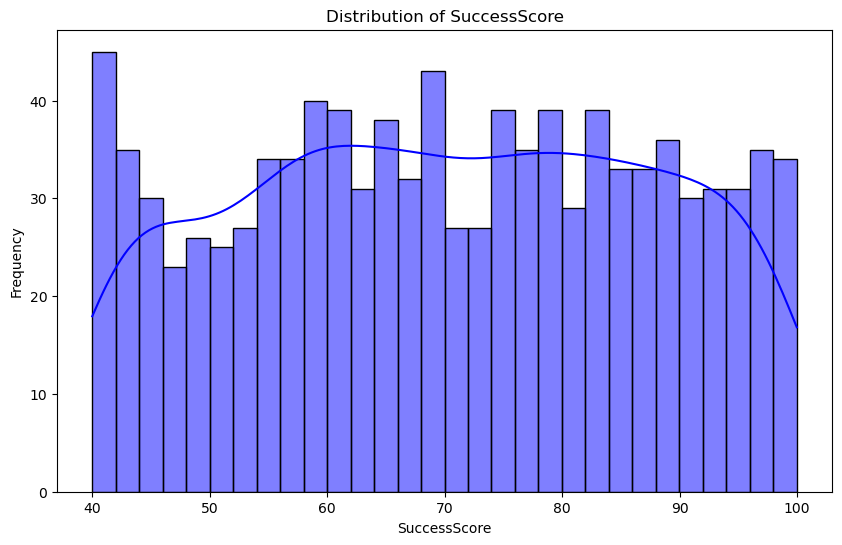

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df_onehotencoded['SuccessScore'], kde=True, color='blue', bins=30)
plt.title('Distribution of SuccessScore')
plt.xlabel('SuccessScore')
plt.ylabel('Frequency')
plt.show()

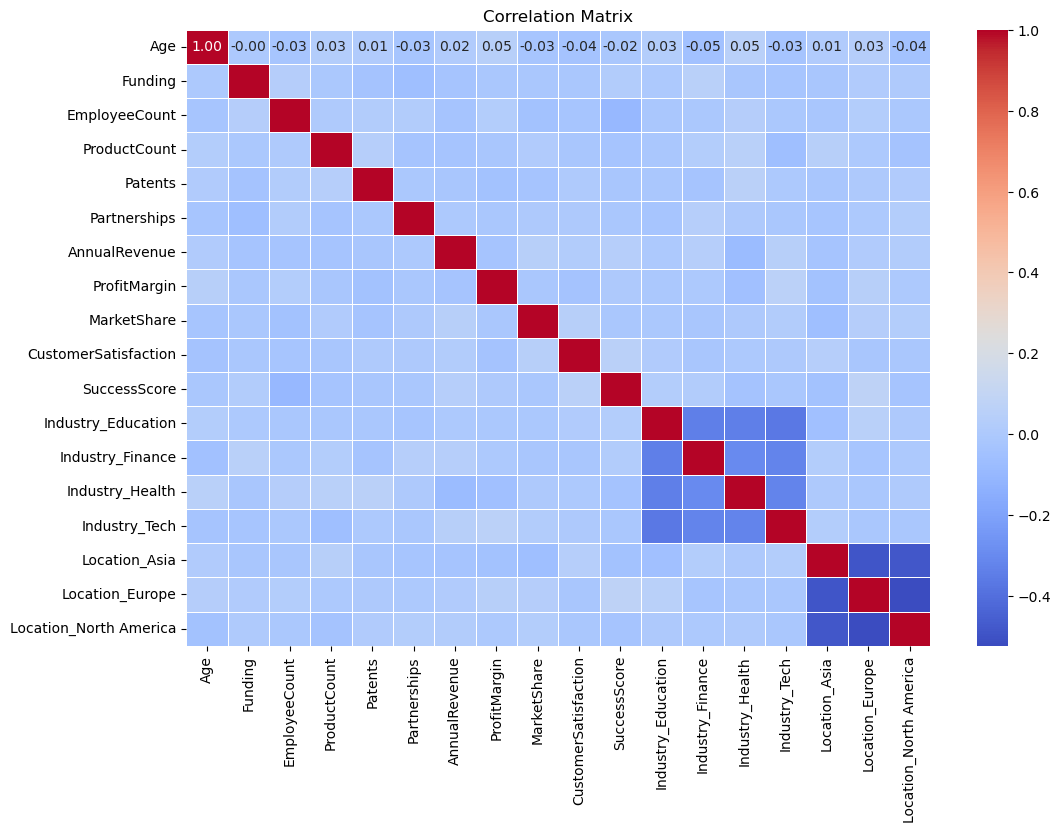

In [27]:
# 2. Generate a heatmap of the correlation matrix
correlation_matrix = df_onehotencoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Part1 Task C - Feature Engineering and PCA (10 pts)

1. Split the data into training and testing sets with 8:2 ratio and standardize the feature set. You need to use `StandardScaler` to ensure that each feature has a mean of 0 and a standard deviation of 1. This standardization is applied to both the training and testing sets to ensure consistency. Use `random_state` = 42 to ensure that the split is reproducible and fixed with every code iteration, allowing for consistent training and evaluation.
2. Plot the explained variance ratio of the principal components and determine visually the number of components to retain 80% of variance.
3. Apply PCA using the number found in the previous step to reduce the feature size.


In [28]:
# Step 1: Split the data into training and testing sets with 8:2 ratio and standardize the feature set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train

,Age,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,Industry_Education,Industry_Finance,Industry_Health,Industry_Tech,Location_Asia,Location_Europe,Location_North America
29,9,54.753970,17,8,7,3,131.477084,16.643907,42.020017,63.051433,1.0,0.0,0.0,0.0,1.0,0.0,0.0
535,13,12.960290,324,3,4,8,125.495493,-18.215824,44.285096,53.830538,0.0,0.0,1.0,0.0,0.0,1.0,0.0
695,16,129.144104,405,5,5,3,12.254457,29.053920,24.860120,99.974818,1.0,0.0,0.0,0.0,0.0,1.0,0.0
557,6,59.276570,21,4,3,3,44.775376,33.747572,41.509628,81.496025,0.0,0.0,1.0,0.0,1.0,0.0,0.0
836,14,128.302729,167,2,9,4,146.240707,4.725794,49.965813,67.621797,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,16,13.508316,219,6,11,9,42.294508,-0.140483,42.122849,56.308480,0.0,0.0,1.0,0.0,0.0,1.0,0.0
270,17,104.528415,172,8,11,9,40.668494,20.553557,33.700368,55.917705,0.0,0.0,1.0,0.0,0.0,1.0,0.0
860,17,183.946439,360,2,5,6,135.384526,24.091031,20.135582,59.367521,1.0,0.0,0.0,0.0,0.0,0.0,1.0
435,20,137.810710,39,7,14,0,24.771454,1.383430,32.967515,81.091228,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
X_test

,Age,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,Industry_Education,Industry_Finance,Industry_Health,Industry_Tech,Location_Asia,Location_Europe,Location_North America
521,3,115.667166,417,4,12,2,132.540651,27.140149,10.508792,62.740163,0.0,1.0,0.0,0.0,0.0,0.0,1.0
737,10,69.945071,400,3,11,1,113.311462,31.231960,33.855318,82.275574,0.0,0.0,0.0,1.0,1.0,0.0,0.0
740,9,60.310205,283,3,13,5,112.692528,-19.519512,7.782400,68.681733,0.0,1.0,0.0,0.0,0.0,0.0,1.0
660,17,133.443890,163,5,14,1,137.893348,21.378311,40.360550,76.325972,1.0,0.0,0.0,0.0,0.0,1.0,0.0
411,20,74.548898,348,5,7,9,27.057706,-1.628245,12.080123,89.225280,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,20,86.481551,323,3,12,8,5.093114,33.472048,15.271638,75.408190,1.0,0.0,0.0,0.0,0.0,1.0,0.0
332,1,123.604770,141,2,8,0,16.833620,-19.195433,6.494940,63.311675,1.0,0.0,0.0,0.0,0.0,0.0,1.0
208,3,61.137307,409,3,10,6,41.059680,-11.179103,49.594643,91.268899,0.0,0.0,1.0,0.0,0.0,0.0,1.0
613,19,48.765370,189,2,5,2,2.507050,-19.188964,41.706933,61.420448,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.21206084, -0.77209202, -1.7069097 , ...,  1.47039292,
        -0.71374643, -0.72776144],
       [ 0.48969168, -1.48201283,  0.46209743, ..., -0.68009033,
         1.4010578 , -0.72776144],
       [ 1.01600606,  0.49152257,  1.03437618, ..., -0.68009033,
         1.4010578 , -0.72776144],
       ...,
       [ 1.19144419,  1.42241253,  0.71644354, ..., -0.68009033,
        -0.71374643,  1.37407665],
       [ 1.71775857,  0.6387363 , -1.55147596, ..., -0.68009033,
        -0.71374643,  1.37407665],
       [-1.44012774, -0.16452061, -1.20528264, ..., -0.68009033,
         1.4010578 , -0.72776144]])

In [32]:
scaler.mean_

array([1.02087500e+01, 1.00207726e+02, 2.58595000e+02, 5.13125000e+00,
       6.83125000e+00, 4.57625000e+00, 7.42114221e+01, 1.07409612e+01,
       2.52493069e+01, 7.41158946e+01, 2.82500000e-01, 2.36250000e-01,
       2.23750000e-01, 2.57500000e-01, 3.16250000e-01, 3.37500000e-01,
       3.46250000e-01])

In [33]:
X_train_scaled.mean(axis = 0), X_train_scaled.std(axis = 0)

(array([-4.88498131e-17,  5.10702591e-17, -1.92623695e-16,  1.57651669e-16,
         5.38458167e-17,  2.99760217e-17,  5.77315973e-17, -7.66053887e-17,
        -1.68753900e-16, -1.46549439e-16,  6.27276009e-17,  1.11299858e-16,
        -5.99520433e-17, -4.88498131e-17,  1.46549439e-16, -4.44089210e-17,
        -2.55351296e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [34]:
X_test_scaled.mean(axis = 0), X_test_scaled.std(axis = 0)

(array([ 0.10811375,  0.03372729, -0.12985782, -0.05283936,  0.00890504,
        -0.02334037,  0.04326283, -0.04747014,  0.08952248,  0.10794505,
        -0.0277645 , -0.05002619,  0.07498384,  0.00571746, -0.03494535,
         0.11102722, -0.07619163]),
 array([1.07697257, 0.91062403, 1.02642739, 0.91649834, 0.99650375,
        1.0149817 , 0.94589263, 1.03608847, 1.03992276, 0.89807623,
        0.98610494, 0.96714711, 1.04584156, 1.00314956, 0.98547523,
        1.03149563, 0.97208591]))

In [35]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [36]:
pca.explained_variance_ratio_

array([9.36555771e-02, 9.12903896e-02, 8.37475191e-02, 7.88480370e-02,
       7.84861841e-02, 6.87657582e-02, 6.46821517e-02, 6.14777150e-02,
       6.06585637e-02, 5.83827230e-02, 5.75122270e-02, 5.50470062e-02,
       5.08996525e-02, 4.94624663e-02, 4.70840293e-02, 3.99439032e-32,
       1.05157871e-32])

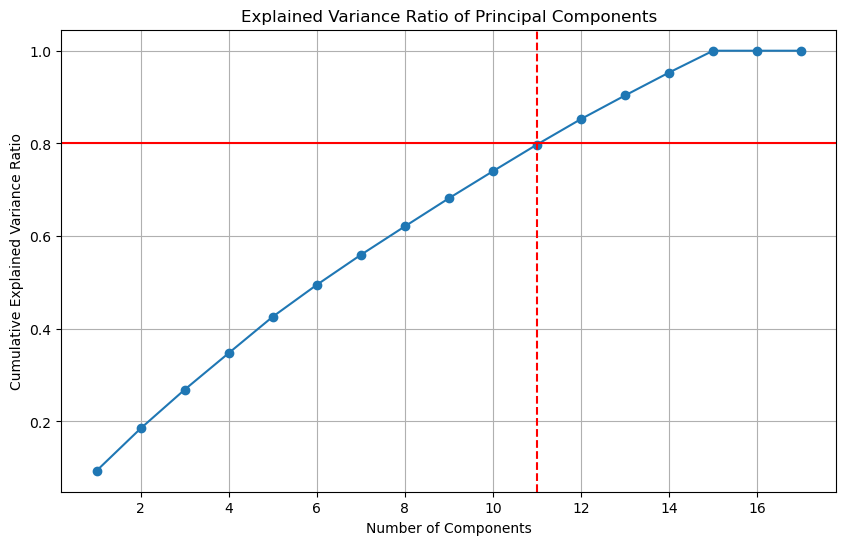

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.title('Explained Variance Ratio of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.8, color='r')
plt.axvline(x=np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.8), color='r', linestyle='--')
plt.grid(True)
plt.show()

In [38]:
print("the number of components: ", np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.8))

the number of components:  11


In [39]:
# Step 3: Determine visually the number of components to retain 80% of variance
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
num_components_80_variance = len(cumulative_variance_ratio[cumulative_variance_ratio <= 0.8]) + 1
print(f"Number of components to retain 80% of variance: {num_components_80_variance}")

Number of components to retain 80% of variance: 12


In [40]:
# Step 4: Apply PCA using the number found in the previous step to reduce the feature size
pca = PCA(n_components=num_components_80_variance)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [41]:
X_train_pca

array([[-0.19982702, -0.71932483,  0.05278772, ...,  0.79247098,
         0.215416  , -0.85719336],
       [ 0.7061056 , -0.52934728, -1.34322698, ..., -0.50348433,
        -1.41379409, -0.74361534],
       [ 2.2046809 , -1.14645594, -0.68176795, ...,  0.56539823,
         0.45994739,  1.40800896],
       ...,
       [ 1.19815557,  1.73315546, -0.38130144, ..., -0.46234702,
        -1.84032777,  0.29978093],
       [ 0.53387061,  1.1572976 , -1.25770106, ..., -1.06580316,
         0.52597249, -0.31332983],
       [ 0.49255218, -0.80549197, -1.40086715, ..., -0.7535164 ,
         2.04262501, -0.71699095]])

In [42]:
X_test_pca

array([[-0.34210081,  1.94631239,  0.33136032, ...,  0.49835222,
        -0.75404096,  0.87447159],
       [-1.03034905, -1.02079473,  2.22398712, ...,  0.64639737,
        -0.90906795,  1.55743006],
       [-0.68066664,  1.90573219, -0.13573449, ..., -1.2340269 ,
        -0.7536943 ,  0.29215909],
       ...,
       [-0.7985782 ,  1.94523156, -1.07381541, ..., -0.00436967,
        -0.07516032,  0.5776673 ],
       [-0.94346017,  1.28248456, -1.68775876, ..., -1.69096015,
         0.0534737 , -0.53224095],
       [-1.53070058, -0.51555535,  0.78926784, ..., -0.11247928,
         0.13656562, -0.2835961 ]])

### Part1 Task D - MLP for Regression (15 pts)

1. Using **TensorFlow's Keras API**, develop and train two MLP regressors over 100 epochs with a batch size of 32:

   - For Model 1, incorporate a single hidden layer containing 32 neurons.
   - Model 2 should feature two hidden layers, with the first layer comprising 32 neurons and the second layer 16 neurons.
   - Additionally, implement a Random Forest Regressor as the traditional regression algorithm to compare its performance against the ANN models.
   - Incorporate L2 regularization in models, use Adam optimizer with a learning rate of **0.01** and **Relu** activation function in hidden layers.

2. Evaluate the model's performance on the test set using Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics.
3. **(Written Answer)** Compare the models and write your conclusion.

Note:

- You might need to create a new optimizer instance for each model. This ensures that each model's training process is independent and avoids conflicts arising from shared optimizer state.
- You can choose between the **Sequential model** from TensorFlow's Keras API and the **MLPRegressor** from scikit-learn for your solution. The former provides a highly flexible and customizable framework for constructing neural networks, allowing for detailed adjustments to model architecture and training procedures. On the other hand, the latter, built on scikit-learn, offers a more direct method for developing multilayer perceptron models tailored specifically to regression tasks, with less complexity in customization but efficiency in straightforward applications.


**Place holder for Written Answer**


In [43]:
X_train_pca.shape[1]

12

In [44]:
# Define the MLP models
def create_model1(input_shape):
    model = Sequential([
        Dense(32, activation='relu', kernel_regularizer=l2(0.01), input_shape=(input_shape, )),
        Dense(1)
    ])
    return model

def create_model2(input_shape):
    model = Sequential([
        Dense(32, activation='relu', kernel_regularizer=l2(0.01), input_shape=(input_shape, )),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1)
    ])
    return model

# Create MLP models
model1 = create_model1(X_train_pca.shape[1])
model2 = create_model2(X_train_pca.shape[1])

In [45]:
X_train_pca.shape[1]

12

In [46]:
# Compile MLP models
optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.01)
model1.compile(optimizer=optimizer1, loss='mse', metrics=['mae'])
optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.01)
model2.compile(optimizer=optimizer2, loss='mse', metrics=['mae'])

In [47]:
# Train MLP models
history1 = model1.fit(X_train_pca, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

2024-03-26 14:51:52.960133: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [48]:
history2 = model2.fit(X_train_pca, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [49]:
# Train Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_pca, y_train)

RandomForestRegressor()

In [50]:
# Evaluate models on test set
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae

In [51]:
# Evaluate MLP models
mse_model1, mae_model1 = evaluate_model(model1, X_test_pca, y_test)
mse_model2, mae_model2 = evaluate_model(model2, X_test_pca, y_test)

# Evaluate Random Forest Regressor
mse_rf, mae_rf = evaluate_model(rf_regressor, X_test_pca, y_test)

print("MLP Model 1 - MSE:", mse_model1, "MAE:", mae_model1)
print("MLP Model 2 - MSE:", mse_model2, "MAE:", mae_model2)
print("Random Forest Regressor - MSE:", mse_rf, "MAE:", mae_rf)

7/7 [==============================] - 0s 745us/step
MLP Model 1 - MSE: 340.2773008172981 MAE: 15.227624236080079
MLP Model 2 - MSE: 471.0828950240775 MAE: 17.835340992434276
Random Forest Regressor - MSE: 311.8521041302782 MAE: 14.7549921201715


### Part1 Task E - Gridsearch for Hyperparameter Optimization (HPO) (20 pts)

1. Define a range of potential values for hyperparameters as follows:
   - `hidden_layer_sizes`:50, 100, 150
   - `activation`: tanh','relu'
   - `learning rate`: 0.0001, 0.001, 0.01
2. Use GridSearchCV to find the best hyperparameter values based on 3 fold cross-validation on MLP model2 from TaskD.
3. Retrain the model using the optimized hyperparameters and evaluate its performance.
4. **(Written Answer)** Comparing the performance of MLP model2 before (from TaskD) and after hyperparameter tuning.


# Note: below is trying, not working at all


In [52]:
# Define a range of potential values for hyperparameters
param_grid = {
    'model__hidden_layer_sizes': [50, 100, 150],
    'model__activation': ['tanh', 'relu'],
    'model__learning_rate': [0.0001, 0.001, 0.01]
}

In [ ]:
def create_model_g(input_shape):
    model = create_model2(input_shape)
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
    return model
model_grid = create_model_g(X_train_pca.shape[1])

In [ ]:
# Use GridSearchCV to find the best hyperparameters
model = KerasRegressor(build_fn = model_grid, epochs=100, verbose=1)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_pca, y_train)

INFO:tensorflow:Assets written to: ram://17c3970fcfba43979280fe63bb543d0a/assets


INFO:tensorflow:Assets written to: ram://17c3970fcfba43979280fe63bb543d0a/assets


Fitting 3 folds for each of 18 candidates, totalling 54 fits


2024-03-25 19:24:48.869214: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://d313c547be8b460284a64fd717a91059: INVALID_ARGUMENT: ram://d313c547be8b460284a64fd717a91059 is a directory.


INFO:tensorflow:Assets written to: ram://611b9bdde67246b3af49e1cb70da819d/assets


INFO:tensorflow:Assets written to: ram://611b9bdde67246b3af49e1cb70da819d/assets
2024-03-25 19:24:49.092304: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://6d717da58c6f43f2a90d1f45bf6b8dee: INVALID_ARGUMENT: ram://6d717da58c6f43f2a90d1f45bf6b8dee is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://e2eb29cbe58540e692ea9f12f6b6096b/assets


INFO:tensorflow:Assets written to: ram://e2eb29cbe58540e692ea9f12f6b6096b/assets
2024-03-25 19:24:49.299134: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://a1fca672f0f24b33a95a297fabee4f82: INVALID_ARGUMENT: ram://a1fca672f0f24b33a95a297fabee4f82 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://bc64ec7c42f147f69d989afb5cacbf62/assets


INFO:tensorflow:Assets written to: ram://bc64ec7c42f147f69d989afb5cacbf62/assets


INFO:tensorflow:Assets written to: ram://e47b818e60db433a918e5ce640a7c470/assets


2024-03-25 19:24:50.442012: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://de4cc22c011e40a4922be9fe275b0005: INVALID_ARGUMENT: ram://de4cc22c011e40a4922be9fe275b0005 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://e47b818e60db433a918e5ce640a7c470/assets


INFO:tensorflow:Assets written to: ram://0e9fa84558034141a4e5f4b84c15ff97/assets


2024-03-25 19:24:50.679847: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://53f640344ff84aa2b62ec23eebab161e: INVALID_ARGUMENT: ram://53f640344ff84aa2b62ec23eebab161e is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://0e9fa84558034141a4e5f4b84c15ff97/assets


INFO:tensorflow:Assets written to: ram://7522af1186b047d48dea98958517bdf1/assets


2024-03-25 19:24:50.904921: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://2fcc85c7aa7b4d2daa65756c0ec69bea: INVALID_ARGUMENT: ram://2fcc85c7aa7b4d2daa65756c0ec69bea is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://7522af1186b047d48dea98958517bdf1/assets


INFO:tensorflow:Assets written to: ram://b3eba005a0e8464d87db694d483b0b18/assets


2024-03-25 19:24:51.125744: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://68d47b91be8d4a829f4dd0396b8d0aac: INVALID_ARGUMENT: ram://68d47b91be8d4a829f4dd0396b8d0aac is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://b3eba005a0e8464d87db694d483b0b18/assets


INFO:tensorflow:Assets written to: ram://3a8adffdcda9414cae3d7ebbba3d48c8/assets


2024-03-25 19:24:51.352982: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://2b979b2854e3438e80932c48feaf86d6: INVALID_ARGUMENT: ram://2b979b2854e3438e80932c48feaf86d6 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://3a8adffdcda9414cae3d7ebbba3d48c8/assets


INFO:tensorflow:Assets written to: ram://5443022d4a6942e4876568c1c1a95db3/assets


2024-03-25 19:24:51.573323: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://1a33a7f020694952b80cdf6d79bcc141: INVALID_ARGUMENT: ram://1a33a7f020694952b80cdf6d79bcc141 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://5443022d4a6942e4876568c1c1a95db3/assets


INFO:tensorflow:Assets written to: ram://a203599e96b5425aa5bba6eef2658ba6/assets


2024-03-25 19:24:51.793708: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://e45b6ad6407d4c98b58d560bcbe28fbe: INVALID_ARGUMENT: ram://e45b6ad6407d4c98b58d560bcbe28fbe is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://a203599e96b5425aa5bba6eef2658ba6/assets


INFO:tensorflow:Assets written to: ram://b9b428253ada4bd89f7af9b6cb193913/assets


2024-03-25 19:24:52.033236: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://e8a16d7c36f146898e0ea290ba067975: INVALID_ARGUMENT: ram://e8a16d7c36f146898e0ea290ba067975 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://b9b428253ada4bd89f7af9b6cb193913/assets


INFO:tensorflow:Assets written to: ram://d607b95e806d4211b54a27f721f05004/assets


2024-03-25 19:24:52.249196: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://d5237856008d43b68fe625cc52d5756d: INVALID_ARGUMENT: ram://d5237856008d43b68fe625cc52d5756d is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://d607b95e806d4211b54a27f721f05004/assets


INFO:tensorflow:Assets written to: ram://540d3457e04e4539988a1b7ca9bf1163/assets


2024-03-25 19:24:52.465039: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://af5ace59a377472c910db495d842bf4a: INVALID_ARGUMENT: ram://af5ace59a377472c910db495d842bf4a is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://540d3457e04e4539988a1b7ca9bf1163/assets


INFO:tensorflow:Assets written to: ram://f7a84c20f06f4567b059e0ea6ddc51c7/assets


2024-03-25 19:24:52.674230: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://d9ba8f03ff454af6afd58f8b295165fa: INVALID_ARGUMENT: ram://d9ba8f03ff454af6afd58f8b295165fa is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://f7a84c20f06f4567b059e0ea6ddc51c7/assets


INFO:tensorflow:Assets written to: ram://561cd41ca5c6470e9a3eb0c206609001/assets


2024-03-25 19:24:52.890860: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://70d77bcdcade47b899c59597dd01468d: INVALID_ARGUMENT: ram://70d77bcdcade47b899c59597dd01468d is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://561cd41ca5c6470e9a3eb0c206609001/assets


INFO:tensorflow:Assets written to: ram://6ada2add69c54269b493608e84cd495e/assets


2024-03-25 19:24:53.103510: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://ae8d84da5ea24cda84b52541ca20df68: INVALID_ARGUMENT: ram://ae8d84da5ea24cda84b52541ca20df68 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://6ada2add69c54269b493608e84cd495e/assets


INFO:tensorflow:Assets written to: ram://2c7afc8b2389413cb7e6167d52539274/assets


2024-03-25 19:24:53.345976: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://f0253497bfdb4e34873db208c944873a: INVALID_ARGUMENT: ram://f0253497bfdb4e34873db208c944873a is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://2c7afc8b2389413cb7e6167d52539274/assets


INFO:tensorflow:Assets written to: ram://e34873166bf14a1093090ce76dedf5aa/assets


2024-03-25 19:24:53.556155: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://7c179ca9240b42be90dc96c84e08173d: INVALID_ARGUMENT: ram://7c179ca9240b42be90dc96c84e08173d is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://e34873166bf14a1093090ce76dedf5aa/assets


INFO:tensorflow:Assets written to: ram://b0bdba70c99f4f989bfab8aca0676a4d/assets


2024-03-25 19:24:53.770012: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://9801bbfaea9f49d3aec9ba1a65a576e5: INVALID_ARGUMENT: ram://9801bbfaea9f49d3aec9ba1a65a576e5 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://b0bdba70c99f4f989bfab8aca0676a4d/assets


INFO:tensorflow:Assets written to: ram://07f412cb20174401bb42f7e5c7aaa468/assets


2024-03-25 19:24:53.976752: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://d93c76aad4da44ffb8d3c9da8cc0667f: INVALID_ARGUMENT: ram://d93c76aad4da44ffb8d3c9da8cc0667f is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://07f412cb20174401bb42f7e5c7aaa468/assets


INFO:tensorflow:Assets written to: ram://1c61d487546c416aac80a3ce31c05ddf/assets


2024-03-25 19:24:54.187124: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://7a35c53bee234a4e92d34604e7c9af86: INVALID_ARGUMENT: ram://7a35c53bee234a4e92d34604e7c9af86 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://1c61d487546c416aac80a3ce31c05ddf/assets


INFO:tensorflow:Assets written to: ram://6667d43acd1e49c5995443d326953a3e/assets


2024-03-25 19:24:54.394219: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://ae5eacdd79134544bcaa89f5f0b3236a: INVALID_ARGUMENT: ram://ae5eacdd79134544bcaa89f5f0b3236a is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://6667d43acd1e49c5995443d326953a3e/assets


INFO:tensorflow:Assets written to: ram://47668eb543554d5c871674d65d5ceffe/assets


2024-03-25 19:24:54.624010: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://c203dfcb77534bfea4b5c7b6d6ce9890: INVALID_ARGUMENT: ram://c203dfcb77534bfea4b5c7b6d6ce9890 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://47668eb543554d5c871674d65d5ceffe/assets


INFO:tensorflow:Assets written to: ram://9ea177fcfd49432da0baa93ad545a1b9/assets


2024-03-25 19:24:54.839069: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://1ad66abe9c58430aa4d22a1a4aeeec99: INVALID_ARGUMENT: ram://1ad66abe9c58430aa4d22a1a4aeeec99 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://9ea177fcfd49432da0baa93ad545a1b9/assets


INFO:tensorflow:Assets written to: ram://32baf0c0e3984cbc8c238a84e5217ef8/assets


2024-03-25 19:24:55.052214: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://16bd67e0c9664bb1970c8684c636ded2: INVALID_ARGUMENT: ram://16bd67e0c9664bb1970c8684c636ded2 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://32baf0c0e3984cbc8c238a84e5217ef8/assets


INFO:tensorflow:Assets written to: ram://6a4b083e314d4a1dabd0f00159e3dc05/assets


2024-03-25 19:24:55.258827: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://5ce17582d2ca494ca6dc8f4b7ea85575: INVALID_ARGUMENT: ram://5ce17582d2ca494ca6dc8f4b7ea85575 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://6a4b083e314d4a1dabd0f00159e3dc05/assets


INFO:tensorflow:Assets written to: ram://0abb574c3d914214b6697bd9ee3ce587/assets


2024-03-25 19:24:55.472513: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://bae323071b3a47f5b4ddccbb5fd79e87: INVALID_ARGUMENT: ram://bae323071b3a47f5b4ddccbb5fd79e87 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://0abb574c3d914214b6697bd9ee3ce587/assets


INFO:tensorflow:Assets written to: ram://3c66c108bc894a00b2d22b57b757b557/assets


2024-03-25 19:24:55.685243: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://6e7cbb3f37bd4e2d9568815136ebeda5: INVALID_ARGUMENT: ram://6e7cbb3f37bd4e2d9568815136ebeda5 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://3c66c108bc894a00b2d22b57b757b557/assets


INFO:tensorflow:Assets written to: ram://ed627b0c3c7a4e07aca7842d03b9551f/assets


2024-03-25 19:24:55.911714: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://2f8fb80f988645b58632c7c4feeffead: INVALID_ARGUMENT: ram://2f8fb80f988645b58632c7c4feeffead is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://ed627b0c3c7a4e07aca7842d03b9551f/assets


INFO:tensorflow:Assets written to: ram://dbc32652947049e6908613d0fe056a56/assets


2024-03-25 19:24:56.125074: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://1167fec8e09b40c9917f77b248b93665: INVALID_ARGUMENT: ram://1167fec8e09b40c9917f77b248b93665 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://dbc32652947049e6908613d0fe056a56/assets


INFO:tensorflow:Assets written to: ram://659adc6eaaa84d659efe68055b424151/assets


2024-03-25 19:24:56.336618: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://5352e432318e403cb228687cb4738a21: INVALID_ARGUMENT: ram://5352e432318e403cb228687cb4738a21 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://659adc6eaaa84d659efe68055b424151/assets


INFO:tensorflow:Assets written to: ram://a91883b2256a4772ab33993044bd9e58/assets


2024-03-25 19:24:56.549794: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://119e739718e44ab285f07701c7461f4f: INVALID_ARGUMENT: ram://119e739718e44ab285f07701c7461f4f is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:tensorflow:Assets written to: ram://a91883b2256a4772ab33993044bd9e58/assets
2024-03-25 19:24:56.761211: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://2b35c74e12464fa7ac0f67c1299bf176: INVALID_ARGUMENT: ram://2b35c74e12464fa7ac0f67c1299bf176 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://c73669aaa6654f19a1495af0a1b965bf/assets


INFO:tensorflow:Assets written to: ram://c73669aaa6654f19a1495af0a1b965bf/assets
2024-03-25 19:24:57.830437: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://6b30b25741ae4ccdab7e0b5150f2d96e: INVALID_ARGUMENT: ram://6b30b25741ae4ccdab7e0b5150f2d96e is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://95d5ad4435714932acc6b01eb9eb8f2c/assets


INFO:tensorflow:Assets written to: ram://95d5ad4435714932acc6b01eb9eb8f2c/assets
2024-03-25 19:24:58.044822: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://7899d1d1970b42fea37c95b155006a92: INVALID_ARGUMENT: ram://7899d1d1970b42fea37c95b155006a92 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://be86b8ccb630454fb9677dfb5ebfd209/assets


INFO:tensorflow:Assets written to: ram://be86b8ccb630454fb9677dfb5ebfd209/assets
2024-03-25 19:24:58.256422: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://0acaee6eff734aa58bf3b6f868d081fe: INVALID_ARGUMENT: ram://0acaee6eff734aa58bf3b6f868d081fe is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://04a5067f829f4988ad275eba074094fe/assets


INFO:tensorflow:Assets written to: ram://04a5067f829f4988ad275eba074094fe/assets
2024-03-25 19:24:58.496301: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://c413504a217049a0bbd74142277efcfa: INVALID_ARGUMENT: ram://c413504a217049a0bbd74142277efcfa is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://2d77838bf218466ab71d51265a3ca7eb/assets


INFO:tensorflow:Assets written to: ram://2d77838bf218466ab71d51265a3ca7eb/assets
2024-03-25 19:24:58.709946: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://ec28f6a90d494f59bb7565f1ecd83082: INVALID_ARGUMENT: ram://ec28f6a90d494f59bb7565f1ecd83082 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://1dbf5937b55f4731ab1c4812407d111a/assets


INFO:tensorflow:Assets written to: ram://1dbf5937b55f4731ab1c4812407d111a/assets
2024-03-25 19:24:58.922042: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://243a9a0c258548d7a9fd8e19cfdd85bc: INVALID_ARGUMENT: ram://243a9a0c258548d7a9fd8e19cfdd85bc is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://de171684373d45cc8be02f9e1eac6779/assets


INFO:tensorflow:Assets written to: ram://de171684373d45cc8be02f9e1eac6779/assets
2024-03-25 19:24:59.133567: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://2858e38273d343cebb0a5aac47c1e0fc: INVALID_ARGUMENT: ram://2858e38273d343cebb0a5aac47c1e0fc is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://de1dcb7d5d3546e990d5172c60454372/assets


INFO:tensorflow:Assets written to: ram://de1dcb7d5d3546e990d5172c60454372/assets
2024-03-25 19:24:59.346785: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://1ea117ee690540489387fbb8576fd695: INVALID_ARGUMENT: ram://1ea117ee690540489387fbb8576fd695 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://2c8cb7c303344b71880ac42a227ba07c/assets


INFO:tensorflow:Assets written to: ram://2c8cb7c303344b71880ac42a227ba07c/assets
2024-03-25 19:24:59.562534: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://2217c48c47ad4ddd8514e30589fd9cd2: INVALID_ARGUMENT: ram://2217c48c47ad4ddd8514e30589fd9cd2 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://537e0c016ad747dc8b0783449350611b/assets


INFO:tensorflow:Assets written to: ram://537e0c016ad747dc8b0783449350611b/assets
2024-03-25 19:24:59.781415: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://de675087a8b14e0ea8f8ee3492cbaf97: INVALID_ARGUMENT: ram://de675087a8b14e0ea8f8ee3492cbaf97 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://6382fd8fd45f4c8cb9cb9a33496e4d5d/assets


INFO:tensorflow:Assets written to: ram://6382fd8fd45f4c8cb9cb9a33496e4d5d/assets
2024-03-25 19:25:00.022255: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://93bb0d6c93744857b546f04d462918da: INVALID_ARGUMENT: ram://93bb0d6c93744857b546f04d462918da is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://73e3b7a8c92f42a68d84202356db585d/assets


INFO:tensorflow:Assets written to: ram://73e3b7a8c92f42a68d84202356db585d/assets
2024-03-25 19:25:00.242661: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://5750282ac50a4ac2af6e12f0c591a36a: INVALID_ARGUMENT: ram://5750282ac50a4ac2af6e12f0c591a36a is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://d575d82eeb8b4b4aa7e1f1afa409eec1/assets


INFO:tensorflow:Assets written to: ram://d575d82eeb8b4b4aa7e1f1afa409eec1/assets
2024-03-25 19:25:00.463472: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://cf99771a5d73422ab82b0f60de51a4b7: INVALID_ARGUMENT: ram://cf99771a5d73422ab82b0f60de51a4b7 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://66031114470649399a64b409055a3b9e/assets


INFO:tensorflow:Assets written to: ram://66031114470649399a64b409055a3b9e/assets
2024-03-25 19:25:00.680629: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://391918ab005e4dcca37642f0b74bcd42: INVALID_ARGUMENT: ram://391918ab005e4dcca37642f0b74bcd42 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://ccd9326bab3d46139426d501ec276510/assets


INFO:tensorflow:Assets written to: ram://ccd9326bab3d46139426d501ec276510/assets
2024-03-25 19:25:00.895528: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://cdc6a0a6924f4d38855f980977d56004: INVALID_ARGUMENT: ram://cdc6a0a6924f4d38855f980977d56004 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://82c5744f650849b3b2f2ef3631654c18/assets


INFO:tensorflow:Assets written to: ram://82c5744f650849b3b2f2ef3631654c18/assets
2024-03-25 19:25:01.113322: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://fde8bccc4d024013ac0dee67c7b20442: INVALID_ARGUMENT: ram://fde8bccc4d024013ac0dee67c7b20442 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://6e545179d0834b6694a7ea1e335a1bff/assets


INFO:tensorflow:Assets written to: ram://6e545179d0834b6694a7ea1e335a1bff/assets
2024-03-25 19:25:01.329950: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://8a0fbfce8db94dfa9a3db1dc96aef8af: INVALID_ARGUMENT: ram://8a0fbfce8db94dfa9a3db1dc96aef8af is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://bdf37bcd382f43329733221d9467e1a1/assets


INFO:tensorflow:Assets written to: ram://bdf37bcd382f43329733221d9467e1a1/assets
2024-03-25 19:25:01.567617: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://82f369edd84b4188a35aa89ad4df7419: INVALID_ARGUMENT: ram://82f369edd84b4188a35aa89ad4df7419 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://49abf44b17bf479393a936b5a047460a/assets


INFO:tensorflow:Assets written to: ram://49abf44b17bf479393a936b5a047460a/assets
2024-03-25 19:25:01.788389: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://fca2b4631fbd4997a718979bd70b4550: INVALID_ARGUMENT: ram://fca2b4631fbd4997a718979bd70b4550 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://4f381e2b4fbb4ee89004419ecbb02936/assets


INFO:tensorflow:Assets written to: ram://4f381e2b4fbb4ee89004419ecbb02936/assets
2024-03-25 19:25:02.005478: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://52d2e460e2fa44d6834114c6200a7078: INVALID_ARGUMENT: ram://52d2e460e2fa44d6834114c6200a7078 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://d148610f1dc14f58853876353406e285/assets


INFO:tensorflow:Assets written to: ram://d148610f1dc14f58853876353406e285/assets
2024-03-25 19:25:02.222570: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://aef0bcf2cade477a81578e9a584225d4: INVALID_ARGUMENT: ram://aef0bcf2cade477a81578e9a584225d4 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: ram://33a492ed7e5044108d7e469d0eb2f026/assets


INFO:tensorflow:Assets written to: ram://33a492ed7e5044108d7e469d0eb2f026/assets
2024-03-25 19:25:02.450421: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ram://bcaaa93d4f28466f91ee84cd8850d134: INVALID_ARGUMENT: ram://bcaaa93d4f28466f91ee84cd8850d134 is a directory.
/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


ValueError: 
All the 54 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py", line 852, in _initialize
    self.model_ = self._build_keras_model()
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/scikeras/wrappers.py", line 429, in _build_keras_model
    model = final_build_fn(**build_params)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: BaseWrapper._check_model_param.<locals>.final_build_fn() got an unexpected keyword argument 'activation'


# Note: Below is Sarah's and worked


In [ ]:
def create_model(hidden_layer_sizes=100, activation='relu', learning_rate=0.01):
    model = Sequential([
        Dense(hidden_layer_sizes, input_shape=(X_train_pca.shape[1],), activation=activation, kernel_regularizer=l2(0.01)),
        Dense(int(hidden_layer_sizes / 2), activation=activation, kernel_regularizer=l2(0.01)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model
# Wrap the model with KerasRegressor
model = KerasRegressor(model=create_model, epochs=100, batch_size=32, verbose=0)

# Define the grid of values
param_grid = {
    'model__hidden_layer_sizes': [50, 100, 150],
    'model__activation': ['tanh', 'relu'],
    'model__learning_rate': [0.0001, 0.001, 0.01]
}

# Setup and execute the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train_pca, y_train)
# Output the best results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



Best: -309.936289 using {'model__activation': 'tanh', 'model__hidden_layer_sizes': 100, 'model__learning_rate': 0.001}


In [ ]:
# Get the best hyperparameters
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'model__activation': 'tanh', 'model__hidden_layer_sizes': 100, 'model__learning_rate': 0.001}


# below is a new try with library of "sklearn.neural_network.MLPRegressor"


In [54]:

# Define the MLP model
mlp = MLPRegressor(max_iter=100)

# Define the hyperparameters to tune
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.0001, 0.001, 0.01]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(mlp, parameters, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Retrain the model using the optimized hyperparameters
best_mlp = MLPRegressor(**best_params)
best_mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = best_mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Output
# Best hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}
# Mean Squared Error: 293.33645127065836

/Users/yangen/anaconda3/envs/mlcourse-311/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yangen/anaconda3/envs/mlcourse-311/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yangen/anaconda3/envs/mlcourse-311/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yangen/anaconda3/envs/mlcourse-311/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization

Best hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}
Mean Squared Error: 293.31331311171095


**Place holder for Written Answer**


## Part 2 - Binary Classification with a Custom MLP (35 pts)

### Background

You are provided with a schematic of a simple Multilayer Perceptron (MLP) neural network designed for binary classification. This network consists of an input layer with two binary inputs, $x_1$ and $x_2$, a hidden layer with two neurons, $h_1$ and $h_2$, and one output neuron, $y$. The weights and biases are pre-defined as follows:

- Weights from the input to hidden layer: $w_{11} = 20, w_{12} = -20, w_{21} = 20, w_{22} = -20$
- Biases for the hidden layer neurons: $b_{1} = -10, b_{2} = 30$
- Weights from the hidden layer to the output layer are both $20$.
- The bias for the output neuron is $-30$.

!["The simple Multilayer Perceptron (MLP) neural network"](NNQ.png)

P.S. For the image to display correctly, it must be located in the same folder as your Assignment #2 file: `Assignment2.ipynb`.

### Objective

Implement a Python program that simulates the described MLP network's forward pass and computes the output for different input combinations.


### Part2 Task A - Sigmoid Activation Function (20 pts)

Write a function that takes binary inputs $x_1$ and $x_2$ and computes the output $y$ using a sigmoid activation function for both the hidden and output layers.
Calculate and print the predicted output for the following input pairs: (0,0), (0,1), (1,0), (1,1). Round the output to the nearest integer.


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define function to compute neuron output given inputs, weights, and bias
def neuron_output(inputs, weights, bias):
    return sigmoid(np.dot(inputs, weights) + bias)

# Define weights and biases for the network
weights_input_hidden = np.array([[20, -20], [20, -20]])
biases_hidden = np.array([-10, 30])
weights_hidden_output = np.array([20, 20])
bias_output = -30

# Define function to compute output of the network given inputs
def compute_output(x1, x2):
    # Compute output of hidden layer neurons
    hidden_outputs = np.array([
        neuron_output([x1, x2], weights_input_hidden[0], biases_hidden[0]),
        neuron_output([x1, x2], weights_input_hidden[1], biases_hidden[1])
    ])
    
    # Compute output of the output layer neuron
    output = neuron_output(hidden_outputs, weights_hidden_output, bias_output)
    
    return round(output)

# Define input pairs
input_pairs = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Calculate and print the predicted output for each input pair
for x1, x2 in input_pairs:
    predicted_output = compute_output(x1, x2)
    print(f"Input: ({x1}, {x2}), Predicted Output: {predicted_output}")

Input: (0, 0), Predicted Output: 0
Input: (0, 1), Predicted Output: 0
Input: (1, 0), Predicted Output: 1
Input: (1, 1), Predicted Output: 0


### Part2 Task B - Linear Activation Function (10 pts)

Modify the function from TaskA to use a linear activation function instead of the sigmoid.
Calculate and print the predicted output for the same input pairs as above.


In [ ]:
# Define the linear activation function
def linear_activation(x):
    return x

# Define function to compute neuron output given inputs, weights, and bias
def neuron_output(inputs, weights, bias):
    return linear_activation(np.dot(inputs, weights) + bias)

# Define function to compute output of the network given inputs
def compute_output(x1, x2):
    # Compute output of hidden layer neurons
    hidden_outputs = np.array([
        neuron_output([x1, x2], weights_input_hidden[0], biases_hidden[0]),
        neuron_output([x1, x2], weights_input_hidden[1], biases_hidden[1])
    ])
    
    # Compute output of the output layer neuron
    output = neuron_output(hidden_outputs, weights_hidden_output, bias_output)
    
    return round(output)

# Calculate and print the predicted output for each input pair
for x1, x2 in input_pairs:
    predicted_output = compute_output(x1, x2)
    print(f"Input: ({x1}, {x2}), Predicted Output: {predicted_output}")

Input: (0, 0), Predicted Output: 370
Input: (0, 1), Predicted Output: -430
Input: (1, 0), Predicted Output: 1170
Input: (1, 1), Predicted Output: 370


### Part2 TaskC - Hidden Neuron operation (3 pts)

Analyze the function of the hidden neuron $h_{1}$ when using a sigmoid activation function. Discuss which logical problem (\(e.g., AND, OR, XOR\)) $h_{1}$ is solving.


Sure, here's the analysis with mathematical equations written in markdown format suitable for rendering in VSCode:

The output of $h_1$ is computed as:

$$h_1 = \text{sigmoid}(w_{11}x_1 + w_{21}x_2 + b_1)$$

Given the weights and biases provided, we can compute $h_1$ as follows:

$$h_1 = \text{sigmoid}(20x_1 + 20x_2 - 10)$$

Let's analyze the behavior of $ h_1 $ for different combinations of $ x_1 $ and $ x_2 $:

1. When both $ x_1 $ and $ x_2 $ are 0:

$$h_1 = \text{sigmoid}(-10) \approx 4.54 \times 10^{-5} \approx 0$$

2. When $ x_1 $ is 0 and $ x_2 $ is 1:

$$h_1 = \text{sigmoid}(10) \approx 0.9999 \approx 1$$

3. When $ x_1 $ is 1 and $ x_2 $ is 0:

$$h_1 = \text{sigmoid}(10) \approx 0.9999 \approx 1$$

4. When both $ x_1 $ and $ x_2 $ are 1:

$$h_1 = \text{sigmoid}(30) \approx 1$$

From these calculations, we can observe that $ h_1 $ outputs a value close to 0 when both $ x_1 $ and $ x_2 $ are 0, and it outputs a value close to 1 when at least one of $ x_1 $ or $ x_2 $ is 1. This behavior is similar to the OR logical operation, where the output is true (1) if at least one of the inputs is true.

Therefore, the hidden neuron $ h_1 $ when using a sigmoid activation function behaves similarly to the OR logical operation.


**Placeholder for Task C answer**


### Part2 Task D - MLP operation (2 pts)

Consider the entire network with a sigmoid activation function. Discuss which logical problem the MLP is designed to solve considering the weights and biases configuration.


To understand the logical problem that the MLP (Multilayer Perceptron) is designed to solve, we need to analyze the behavior of the entire network, considering the weights and biases configuration.

The given network consists of an input layer with two binary inputs, $ x_1 $ and $ x_2 $, a hidden layer with two neurons, $ h_1 $ and $ h_2 $, and one output neuron, $ y $. The weights and biases are configured as follows:

- Weights from the input to hidden layer: $ w*{11} = 20, w*{12} = -20, w*{21} = 20, w*{22} = -20 $
- Biases for the hidden layer neurons: $ b*{1} = -10, b*{2} = 30 $
- Weights from the hidden layer to the output layer are both $ 20 $.
- The bias for the output neuron is $ -30 $.

Given this configuration, let's analyze the behavior of the output neuron $ y $ for different combinations of $ x_1 $ and $ x_2 $:

1. When both $ x_1 $ and $ x_2 $ are 0:

   $$
   y = \text{sigmoid}(20(0) + 20(0) - 30) \approx \text{sigmoid}(-30) \approx 4.54 \times 10^{-5} \approx 0
   $$

2. When $ x_1 $ is 0 and $ x_2 $ is 1:

   $$
   y = \text{sigmoid}(20(0) + 20(1) - 30) \approx \text{sigmoid}(-10) \approx 4.54 \times 10^{-5} \approx 0
   $$

3. When $ x_1 $ is 1 and $ x_2 $ is 0:

   $$
   y = \text{sigmoid}(20(1) + 20(0) - 30) \approx \text{sigmoid}(-10) \approx 4.54 \times 10^{-5} \approx 0
   $$

4. When both $ x_1 $ and $ x_2 $ are 1:
   $$
   y = \text{sigmoid}(20(1) + 20(1) - 30) \approx \text{sigmoid}(10) \approx 0.9999 \approx 1
   $$

From these calculations, we can observe that the output neuron $ y $ outputs a value close to 0 when both $ x_1 $ and $ x_2 $ are 0 or when only one of them is 1, and it outputs a value close to 1 only when both $ x_1 $ and $ x_2 $ are 1.

This behavior is similar to the logical XOR (exclusive OR) operation, where the output is true (1) if and only if exactly one of the inputs is true.

Therefore, the MLP is designed to solve the XOR logical problem.


**Placeholder for Task D answer**


## Part 3 - Convolutional Neural Network (CNN) - (15 Bonus pts)

### Objective:

Develop a Convolutional Neural Network (CNN) model to classify handwritten digits from the MNIST dataset. Your tasks involve loading and preprocessing the dataset, designing a CNN architecture, training the model while reserving a portion of the data for validation, and evaluating the model's performance. Additionally, assess if the model exhibits overfitting through the analysis of learning curves.


### Part3 TaskA - Image Classification (20 pts)

1. Load the MNIST Dataset which consists of grayscale images of handwritten digits. Normalize the image pixel values to a range of [0, 1], reshape the images to fit the CNN input requirements and convert the labels to one-hot encoded vectors for classification.
2. Design a CNN architecture for classifying MNIST handwritten digits with input layer of 28x28 pixel grayscale images, followed by three convolutional layers with ReLU activation (the first with 32 filters of size 3x3, the second with 64 filters of size 3x3 plus a max pooling layer of size 2x2, and the third also with 64 filters of size 3x3 followed by another max pooling layer of size 2x2). After these, a flatten layer transitions the output to a 1D vector, leading to a dense layer with 64 units (ReLU activation), and culminating in an output layer with 10 units for the 10 digit classes (0-9) using softmax activation.
3. Keep 20% of MNIST training dataset for validation and train the CNN on the remaining part of MNIST training dataset.
4. Plot the learning curves.
5. **(Written Answer)** Explain whether the model overfits or not.
6. Evaluate the model's accuracy and F1-score on the MNIST test dataset.


In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# # Normalize the image pixel values to a range of [0, 1]
# train_images = train_images.astype('float32') / 255
# test_images = test_images.astype('float32') / 255

# # Reshape the images to fit the CNN input requirements
# train_images = np.expand_dims(train_images, axis=-1)
# test_images = np.expand_dims(test_images, axis=-1)

# # Convert the labels to one-hot encoded vectors
# num_classes = 10
# train_labels = to_categorical(train_labels, num_classes)
# test_labels = to_categorical(test_labels, num_classes)

**Place holder for Written Answer**
